This document contains the code for the dictionary analysis and exploratory data analysis as well as the various sample generation techniques trialled to gain a sample of 1500 sentences for hand coding. Google Colab is used as opposed to the jupyter notebook run on my personal computer, which was used for getting the data and corpus creation, as it has more RAM and access to copmuting power.

In [1]:
from google.colab import files
uploaded_files = files.upload()

Saving references.csv to references.csv


In [2]:
from google.colab import files
uploaded_files = files.upload()

Saving mfd2.0.dic to mfd2.0.dic


In [50]:
from google.colab import files
uploaded_files = files.upload()

Saving sample_labelled1.csv to sample_labelled1.csv


Code for loading the dictionary and some of the exploratory data analysis was adapted from this coding tutorial: https://ds-modules.github.io/modules-textbook/rhetoric/02-Moral-Foundations-Analysis/02-Moral-Foundations-Analysis.html and also this repository: https://github.com/negar-mokhberian/Moral_Foundation_FrameAxis

In [3]:
#importing the additional packages for loading the dictionary.
import csv
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

#here I am creating a function to load the mfd2.0, as nested dictionaries of numbered categorys, linked to an associated moral foundation, each with their associoated words. this was created using the examples on this website: https://www.programcreek.com/python/?CodeExample=load%20dictionary
def load_dictionary(dic_file_path):
    dictionary = {}
    with open(dic_file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                line = line.strip()
                if line:
                    elements = line.split('\t')
                    if len(elements) != 2:
                        continue
                    word, category = elements
                    if category not in dictionary:
                        dictionary[category] = set()
                    dictionary[category].add(word)
    return dictionary

#creating and loading the mfd2.0
dictionary = load_dictionary('mfd2.0.dic')
print(dictionary)

{'care.virtue': {'1'}, 'care.vice': {'2'}, 'fairness.virtue': {'3'}, 'fairness.vice': {'4'}, 'loyalty.virtue': {'5'}, 'loyalty.vice': {'6'}, 'authority.virtue': {'7'}, 'authority.vice': {'8'}, 'sanctity.virtue': {'9'}, 'sanctity.vice': {'10'}, '1': {'rescued', 'helpfulness', 'mothering', 'hospitalizes', 'comforting', 'generosity', 'nurturing', 'safety', 'childcare', 'alleviate', 'beneficence', 'hugs', 'loved', 'heal', 'healer', 'gentleness', 'relieving', 'helps', 'protects', 'protectiveness', 'pities', 'wound', 'helped', 'empathizers', 'childbirth', 'safeness', 'empathises', 'hospitality', 'alleviated', 'safely', 'childhood', 'hospitalises', 'caringly', 'rescues', 'nurses', 'hospitalise', 'helpful', 'generously', 'wounding', 'empathize', 'clothe', 'vulnerability', 'sympathizer', 'hospitalising', 'console', 'health', 'pitied', 'child', 'pitying', 'safeguard', 'motherly', 'solace', 'nurse', 'alleviates', 'help', 'healed', 'pity', 'hospitalizing', 'relieves', 'alleviation', 'protecter', '

In [ ]:
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np

#this section of the code investigates the counts of each dictionary term across the references to China dataset.
term_counts = Counter()
df = pd.read_csv('references.csv')

#Here I am using regular expressions to remove all the weird characters from the texts in the dataframe
def remove_special_characters(text):
  #define the regular expression to remove all non a-z characters and some punctuation - keeping punctuation typically used to demarcate sentences.
    pattern = r'[^A-Za-z\s\.,!?-]'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = cleaned_text.replace('-', ' ')
    return cleaned_text

#this uses the function above in the texts in the referecnes to China dataset.
df['text4'] = df['Reference to China'].apply(lambda x: remove_special_characters(x))
#to check over the dictionary words, each category in the dictionary is converted into a set of words.
dictionary_words = [word for set_of_words in dictionary.values() for word in set_of_words]

text = ' '.join(df['text4'])
text = text.lower().translate(str.maketrans('', '', string.punctuation))
term_counts = Counter(word for word in text.split() if word in dictionary_words)

#displaying the most frequently used 20 words across the texts in the dictionary.
for word, count in term_counts.most_common(20):
  print(f'{word}: {count}')


In [ ]:
#This part of the code is actually used for dictionary customisation - later in the document. Here I am printing a list of dictionary terms which are viewed as uninformative outliers - as their term
#count is 1.5 s.ds above the mean count for words in the texts.

counts = list(term_counts.values())
mean_count = np.mean(counts)
std_dev = np.std(counts)
print(mean_count)

threshold = mean_count + (1.5 * std_dev)
print(threshold)

for term, count in term_counts.items():
    if count > threshold:
        print(f'{term}: {count}')

The code used to customise the dictionary follows the steps laid out by Hackenburg (2022). The code used for the following sections for customisation and for applying Zipf's law/plotting graphs is adapted fomr Hackenburgs replication materials provided here: https://github.com/kobihackenburg/LSE-Dissertation

In [ ]:
import numpy as np

#implementing Zipf's Law to show that the ranks of each term in the MFD2.0 is inversely proportionary to the frequency of each term.
#this is done by party.

# Create an empty Counter to store the word counts
term_counts_lab = Counter()
term_counts_con = Counter()

for text, party in zip(df['text4'], df['party2']):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    term_counts = term_counts_lab if party == 'Lab' else term_counts_con
    #updating the counts if the word is presentin the list of dictionary words.
    term_counts.update(word for word in text.split() if word in dictionary_words)

# Here I am calculating all the term ranks for Lab - and ordering them.
term_ranks_lab = np.arange(1, len(term_counts_lab) + 1)
term_counts_sorted_lab = np.array(list(term_counts_lab.values()))
term_freq_sorted_lab = np.sort(term_counts_sorted_lab)[::-1]

# Here I am calculating all the term ranks for Con - and ordering them.
term_ranks_con = np.arange(1, len(term_counts_con) + 1)
term_counts_sorted_con = np.array(list(term_counts_con.values()))
term_freq_sorted_con = np.sort(term_counts_sorted_con)[::-1]

#this code creates a simple line graph of the above counts.
plt.plot(term_ranks_lab, term_freq_sorted_lab, label='Lab')
plt.plot(term_ranks_con, term_freq_sorted_con, label='Con')

plt.xlabel('Term Rank')
plt.ylabel('Term Frequency')
plt.title('Rank Frequency Distribution of Moral Terms by Party')
plt.legend()
plt.show()

In [ ]:
#to check again if Zipf's law holds, as carried out by Hackbenburg (2021), the log of term frequency and term rank is also plotted.
log_term_ranks_lab = np.log(term_ranks_lab)
log_term_freq_lab = np.log(term_freq_sorted_lab)
log_term_ranks_con = np.log(term_ranks_con)
log_term_freq_con = np.log(term_freq_sorted_con)

# Plotting the log transformation for rank frequency distribution
plt.plot(log_term_ranks_lab, log_term_freq_lab, label='Lab')
# this plots the log transformation of the rank frequency distribution for Con
plt.plot(log_term_ranks_con, log_term_freq_con, label='Con')
plt.xlabel('Log(Term Rank)')
plt.ylabel('Log(Term Frequency)')
plt.title('Log Rank Frequency Distribution of Moral Terms by Party')
plt.legend()
plt.show()

#the dictionary has now been validated on the references to China dataset.

In order to customise the MFd2.0, the average TF-IDF score for each term across all references to China is calculated and plotted on a line graph - again this is expected to follow the same patters of Zipf's law and is also performed by Hackenburg (2021).

In [ ]:
# Create an empty Counter to store the word counts
term_counts = Counter()

for text in df['text4']:
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    term_counts.update(word for word in text.split() if word in dictionary_words)

# Calculate term ranks
term_ranks = np.arange(1, len(term_counts) + 1)
term_counts_sorted = np.array(list(term_counts.values()))
term_freq_sorted = np.sort(term_counts_sorted)
# this code both removes duplicate terms and then accesses the texts in the text4 column which contain words from the dictionary.
dictionary_words = list(set(dictionary_words))
dictionary_words2 = [word for word in dictionary_words if word in term_counts]
texts = [text.lower().translate(str.maketrans('', '', string.punctuation)) for text in df['text4']]
#in order to calculate the tf-idf scores the tf-idf vectoriser is used to turn the texts into numeric vectors and then extract the terms from the the vectoriser.
vectorizer = TfidfVectorizer(vocabulary=dictionary_words2)
tfidf_scores = vectorizer.fit_transform(texts).toarray()
terms = vectorizer.get_feature_names_out()
# this is an important step as it makes sure that for each term only on point is plotted - as the average tf-idf scores for each dictionary term is calculated across all texts in the text4 column.
tfidf_scores_avg = np.mean(tfidf_scores, axis=0)

#This code creates a scatter plot of all the averaged tf-idf scores.
plt.plot(term_freq_sorted, tfidf_scores_avg, 'o')
#this additional part of the plotting code - annoates the words which have the highest term frequency to show that they are unimportant terms.
top_terms = term_counts.most_common(5)
for term, count in top_terms:
    index = np.where(term_freq_sorted == count)[0][0]
    plt.annotate(term, (term_freq_sorted[index], tfidf_scores_avg[index]), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)

plt.xlabel('Term Freq')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Scores for Dictionary Terms')
plt.show()


In [ ]:
## Here I am investigating the third and final step of customisation, using zipf's law to plot a log transformation of the td-idf scores, to see if there is a threshold below which the terms just drop to 0.

from scipy.stats import rankdata

# find the tf-idf scors and take their log and also calculate the term ranks again and then take their log.
log_tfidf_scores = np.log(tfidf_scores_avg)
term_ranks = rankdata([-term_counts[term] for term in dictionary_words2], method='min')
log_term_ranks = np.log(term_ranks)

#this plots a scatter graph for the above code.
plt.plot(log_term_ranks, log_tfidf_scores, 'o')
plt.xlabel('Log Term Rank')
plt.ylabel('Log TF-IDF Score')
plt.title('TF-IDF Scores for Dictionary Terms')

# A line for the threshold below which terms are removed is also plotted.
threshold = 0.00008
plt.axhline(y=np.log(threshold), color='red', linestyle='--')
ytick_values = np.exp(plt.yticks()[0])
plt.yticks(plt.yticks()[0], ytick_values)
plt.show()

In [ ]:
#THIS BLOCK Of CODE - ACCESSES THE TERMS IN THE DICTIONARY WORDS LISTS WHICH CORRESPOND TO SCORES WHICH ARE LOWER THAN THE THRESHOLD
dictionary_words2 = [word for word in dictionary_words if term_counts[word] >= 2]
dictionary_words2 = list(set(dictionary_words2))
texts = [text.lower().translate(str.maketrans('', '', string.punctuation)) for text in df['text4']]
vectorizer = TfidfVectorizer(vocabulary=dictionary_words2)
tfidf_scores = vectorizer.fit_transform(texts).toarray()
terms = vectorizer.get_feature_names_out()
tfidf_scores_avg = np.mean(tfidf_scores, axis=0)
below_threshold_indices = np.where(tfidf_scores_avg < 0.00008)[0]
below_threshold_terms = [terms[i] for i in below_threshold_indices]
print(len(below_threshold_terms))

print("Terms with TF-IDF scores below 0.0008:")
for term in below_threshold_terms:
    print(term)

In [16]:
#remove terms the occur in frequently and comparing the lengths of the original MFD2.0, after this customisations.
df['text4'] = df['Reference to China']
dictionary_new3 = dictionary.copy()
# Step 1: Convert the 'text4' column to lowercase
df['text4'] = df['text4'].str.lower()

dictionary_terms = set(term for sublist in dictionary_new3.values() for term in sublist)
text_terms = set(df['text4'].str.split().explode())
terms_not_in_text = dictionary_terms - text_terms

for key in dictionary_new3:
    dictionary_new3[key] = dictionary_new3[key] - terms_not_in_text

original_length = len(dictionary_terms)
modified_length = sum(len(values) for values in dictionary_new3.values())

print("Original Dictionary Length:", original_length)
print("Modified Dictionary Length:", modified_length)

print(dictionary_new3)

Original Dictionary Length: 2051
Modified Dictionary Length: 873
{'care.virtue': {'1'}, 'care.vice': {'2'}, 'fairness.virtue': {'3'}, 'fairness.vice': {'4'}, 'loyalty.virtue': {'5'}, 'loyalty.vice': {'6'}, 'authority.virtue': {'7'}, 'authority.vice': {'8'}, 'sanctity.virtue': {'9'}, 'sanctity.vice': {'10'}, '1': {'rescued', 'comforting', 'nurturing', 'generosity', 'safety', 'alleviate', 'heal', 'loved', 'relieving', 'helps', 'protects', 'wound', 'helped', 'hospitality', 'alleviated', 'safely', 'childhood', 'nurses', 'helpful', 'generously', 'vulnerability', 'health', 'child', 'safeguard', 'solace', 'nurse', 'help', 'pity', 'alleviation', 'empathy', 'relieved', 'nursery', 'comfort', 'humane', 'care', 'charity', 'sympathy', 'condolences', 'sharing', 'healing', 'cares', 'protection', 'feeds', 'patient', 'relief', 'kindness', 'protective', 'charitable', 'nurtured', 'protect', 'caring', 'helping', 'benefit', 'protecting', 'nurture', 'benevolent', 'benefits', 'hugging', 'generous', 'patients

In [17]:
#performing the remaining customisation steps to produces the final shortened/and domain specific MFD2.0.
dictionary5 = dictionary_new3.copy()
#a dictionary of words to remove from the dictionary is created, this list is comprised of words with lower td-idf scores and also words which have a frequency 1.5 sd higher than the average count.
words_to_remove = {'communion', 'thieves', 'stature', 'mucking', 'kin', 'catholicism', 'assaulting', 'retribution', 'bosses', 'thief', 'lawfully', 'dues', 'gods', 'rioting', 'inhumanity', 'tribunals', 'obeying', 'divorce', 'compassionate', 'degrade', 'permissive', 'feeds', 'abhor', 'persecuting', 'controller', 'assaulted', 'christ', 'addicted', 'scriptures', 'monastic', 'trash', 'immunities', 'united', 'countries', 'community', 'authorities', 'president', 'help', 'companies', 'country', 'war', 'order', 'rights', 'respect', 'health', 'together', 'nations', 'group', 'company', 'law'}
#this checks that all terms with a count less than 3 have been removed from the dictionary.
terms_less_than_3 = []
for key, values in dictionary5.items():
    for term in values:
        count = df['text4'].str.count(term.lower()).sum()
        if count < 3:
            terms_less_than_3.append(term)

modified_dictionary = {key: [term for term in values if term not in terms_less_than_3 and term not in words_to_remove] for key, values in dictionary_new3.items()}
original_length = sum(len(values) for values in dictionary5.values())
modified_length = sum(len(values) for values in modified_dictionary.values())

print("Original Dictionary Length:", original_length)
print("Modified Dictionary Length:", modified_length)


Original Dictionary Length: 873
Modified Dictionary Length: 607


In [18]:
print(modified_dictionary)
# Convert dictionary to text file
with open('modified_dictionary.txt', 'w') as file:
    for key, values in modified_dictionary.items():
        file.write(key + ': ' + ', '.join(values) + '\n')
#the above code creates a text file of the modified dictionary to view the terms than remain in each category of the dictionary.

{'care.virtue': ['1'], 'care.vice': ['2'], 'fairness.virtue': ['3'], 'fairness.vice': ['4'], 'loyalty.virtue': ['5'], 'loyalty.vice': ['6'], 'authority.virtue': ['7'], 'authority.vice': ['8'], 'sanctity.virtue': ['9'], 'sanctity.vice': ['10'], '1': ['rescued', 'generosity', 'safety', 'alleviate', 'heal', 'loved', 'helps', 'protects', 'wound', 'helped', 'hospitality', 'alleviated', 'safely', 'childhood', 'nurses', 'helpful', 'generously', 'vulnerability', 'child', 'safeguard', 'nurse', 'pity', 'alleviation', 'relieved', 'nursery', 'comfort', 'humane', 'care', 'charity', 'sympathy', 'condolences', 'sharing', 'healing', 'cares', 'protection', 'patient', 'relief', 'protective', 'charitable', 'protect', 'helping', 'benefit', 'protecting', 'nurture', 'benefits', 'generous', 'patients', 'healthy', 'mothers', 'alleviating', 'compassion', 'shared', 'protected', 'loves', 'feeding', 'share', 'hospital', 'rescue', 'shares', 'cared', 'loving', 'love', 'beneficiary', 'feed', 'safe', 'relieve', 'heal

In [19]:
# the text file is then converted it back to a dictionary so that it can be applied to the references to China dataset.
updated_dictionary = {}
with open('modified_dictionary.txt', 'r') as file:
    for line in file:
        key, values = line.strip().split(': ')
        values = values.split(', ')
        updated_dictionary[key] = set(values)

# Print the updated dictionary
print(updated_dictionary)

modified_length = sum(len(values) for values in modified_dictionary.values())
print(modified_length)

{'care.virtue': {'1'}, 'care.vice': {'2'}, 'fairness.virtue': {'3'}, 'fairness.vice': {'4'}, 'loyalty.virtue': {'5'}, 'loyalty.vice': {'6'}, 'authority.virtue': {'7'}, 'authority.vice': {'8'}, 'sanctity.virtue': {'9'}, 'sanctity.vice': {'10'}, '1': {'child', 'rescued', 'protect', 'share', 'generosity', 'helping', 'safety', 'safeguard', 'benefit', 'protecting', 'nurse', 'nurture', 'alleviate', 'hospital', 'pity', 'rescue', 'shares', 'cared', 'alleviation', 'loved', 'heal', 'loving', 'benefits', 'relieved', 'helps', 'nursery', 'protects', 'comfort', 'humane', 'wound', 'care', 'love', 'helped', 'charity', 'generous', 'patients', 'sympathy', 'condolences', 'sharing', 'hospitality', 'alleviated', 'healing', 'safely', 'healthy', 'childhood', 'cares', 'mothers', 'protection', 'beneficiary', 'alleviating', 'patient', 'nurses', 'feed', 'compassion', 'helpful', 'shared', 'generously', 'protected', 'relief', 'safe', 'relieve', 'protective', 'vulnerability', 'charitable', 'healthcare', 'loves', 'f

The next section of this document performs the various dictionary applications to the references to china dataset in order to assess class balance.

In [20]:
#this block of code merges the valence categories of the dictionary together to create a modified MFD2.0 which has 5 rather than 10 categories.

# the dictionaries are combined using methods show in this tutorial: https://www.geeksforgeeks.org/python-combine-the-values-of-two-dictionaries-having-same-key/
dictionary2 = updated_dictionary.copy()

#group 1 and 2 become group 1, then group 3 and 4 become group 2 etc....
dictionary2['1'] = dictionary2.get('1', set()) | dictionary2.get('2', set())
dictionary2['2'] = dictionary2.get('3', set()) | dictionary2.get('4', set())
dictionary2['3'] = dictionary2.get('5', set()) | dictionary2.get('6', set())
dictionary2['4'] = dictionary2.get('7', set()) | dictionary2.get('8', set())
dictionary2['5'] = dictionary2.get('9', set()) | dictionary2.get('10', set())


#this code removes the old empty categories of words.
del dictionary2['6']
del dictionary2['7']
del dictionary2['8']
del dictionary2['9']
del dictionary2['10']

# saving the dictionary again and checking that the words for each group have been successfully merged together.
import pickle
with open('updated_dictionary.dic', 'wb') as file:
    pickle.dump(dictionary2, file)
with open('updated_dictionary.dic', 'rb') as file:
    loaded_dictionary = pickle.load(file)

print(loaded_dictionary)

{'care.virtue': {'1'}, 'care.vice': {'2'}, 'fairness.virtue': {'3'}, 'fairness.vice': {'4'}, 'loyalty.virtue': {'5'}, 'loyalty.vice': {'6'}, 'authority.virtue': {'7'}, 'authority.vice': {'8'}, 'sanctity.virtue': {'9'}, 'sanctity.vice': {'10'}, '1': {'rescued', 'abuser', 'pain', 'harming', 'generosity', 'safety', 'threatens', 'alleviate', 'heal', 'loved', 'distressing', 'exploited', 'helps', 'casualties', 'protects', 'wound', 'afflicted', 'abusing', 'helped', 'rape', 'fighter', 'inhuman', 'anguish', 'hospitality', 'alleviated', 'inflict', 'safely', 'childhood', 'endanger', 'harm', 'bullies', 'die', 'nurses', 'exploitation', 'helpful', 'generously', 'suffered', 'vulnerability', 'fight', 'assault', 'killer', 'unhelpful', 'child', 'exploit', 'hurt', 'damage', 'safeguard', 'sufferer', 'damaging', 'endangered', 'nurse', 'genocidal', 'pity', 'distressed', 'alleviation', 'kills', 'raped', 'relieved', 'nursery', 'comfort', 'humane', 'inflicted', 'harmful', 'care', 'charity', 'pains', 'destroyed

This section of the code assigns different values to each of the moral categories to enable classification. NOTE: not all of the classifications are used in the final analysis.

In [21]:
#double checking that all odd characters have been removed from the texts that will be assigned values so that this does not impact the moral words which are flagged by the texts.
df['text4'] = df['Reference to China'].apply(lambda x: remove_special_characters(x))

#text for is the column from which all moral categories are assigned
column_to_analyze = 'text4'
#this function matches words to those in the customised dictionary is a match is found the column is labelled 1 if not it is labelled 0.
def classify_row(row_text, dictionary2):
  #all the words are extracted and matched to words in the customised dictionary.
    words = re.findall(r'\b\w+\b', row_text.lower())
    for words_list in dictionary2.values():
        words_found = [word for word in words_list if word in words]
        if words_found:
            return 1
    return 0
#here the function is applied across the whole dataframe of references.
df['moral_or_not'] = df[column_to_analyze].apply(lambda x: classify_row(x, dictionary2))

In [22]:
# this function performas very similar operation, execpt it assigns the values 0-6 to different moral categories, and assigns multiple categories by iterating over all of the texts
column_to_analyze = 'text4'

def classify_row2(row_text, dictionary2):
    words = re.findall(r'\b\w+\b', row_text.lower())
    categories_found = []
    #iterate of all words in the words list
    for category, words_list in dictionary2.items():
        words_found = [word for word in words_list if word in words]
        #once a word is found assign its category
        #if not words found assign 0.
        if words_found:
            categories_found.append(category)
    if categories_found:
        return ', '.join(categories_found)
    return "0"

# Classify each row in the DataFrame
df['multiple_mf_dict'] = df[column_to_analyze].apply(lambda x: classify_row2(x, dictionary2))

In [23]:
column_to_analyze = 'text4'
#here I am adapting the above function so that as words are found the word is appended into a flagged words column so that I can check that the function is correctly identifying moral words form the words list.
def classify_row(row_text, dictionary2):
    words = re.findall(r'\b\w+\b', row_text.lower())
    categories_found = []
    #this creates the empty flagged words list.
    flagged_words = []
    for category, words_list in dictionary2.items():
        words_found = [word for word in words_list if word in words]
        if words_found:
            categories_found.append(category)
            #this new line of code then adds the found moral words.
            flagged_words.extend(words_found)
    if categories_found:
      #here the category and the moral words are joined together
        return ', '.join(categories_found), ', '.join(flagged_words)
    return "0", ""

#the categories and flagged words are then added to each of their respective columns which are created and added to the dataframe.
df['multiple_mf_dict'], df['moral_words_flagged'] = zip(*df[column_to_analyze].apply(lambda x: classify_row(x, dictionary2)))

In [24]:
import random
column_to_analyze = 'text4'
#this function further adapts the above so that only one moral foundation is assigned to each text.
def classify_row(row_text, dictionary2):
    words = re.findall(r'\b\w+\b', row_text.lower())
    categories_found = []
    flagged_words = []
    for category, words_list in dictionary2.items():
        words_found = [word for word in words_list if word in words]
        if words_found:
            categories_found.append(category)
            flagged_words.extend(words_found)
    if categories_found:
        category_counts = {category: flagged_words.count(word) for category, word in zip(categories_found, flagged_words)}
        max_count = max(category_counts.values())
        #this additional section of code ensure than the moral category with the largest count is assigned and if the counts are equal for two categories the categories is assigned by a random choice.
        max_categories = [category for category, count in category_counts.items() if count == max_count]
        chosen_category = random.choice(max_categories)
        return chosen_category, ', '.join(flagged_words)
    return "0", ""

df['moral_mf_single'], df['moral_words_flagged'] = zip(*df[column_to_analyze].apply(lambda x: classify_row(x, dictionary2)))

In [25]:
#lastly this function assigns categories based on their moral sentiment - if they be belong to an odd category they are positive, but if they are in an even category they are negative - this used the customised dictionary before categories were combined.
def classify_row(row_text, dictionary):
    words = re.findall(r'\b\w+\b', row_text.lower())
    #creating counters for words in the odd and even categories of the dictionary.
    odd_categories = [category for category in updated_dictionary.keys() if category[-1].isdigit() and int(category[-1]) % 2 != 0]
    even_categories = [category for category in updated_dictionary.keys() if category[-1].isdigit() and int(category[-1]) % 2 == 0]
    odd_counts = Counter(word for word in words if any(word in updated_dictionary[category] for category in odd_categories))
    even_counts = Counter(word for word in words if any(word in updated_dictionary[category] for category in even_categories))
#this section of the code ensures that the category with the largest count is assigned if counts are equal the category is assigned at random, using hte if, elif esle structure.
    if odd_counts and even_counts:
        max_odd_count = max(odd_counts.values())
        max_even_count = max(even_counts.values())
        if max_odd_count > max_even_count:
            return 1
        elif max_even_count > max_odd_count:
            return 2
        else:
            return random.choice([1, 2])
    elif odd_counts:
        return 1
    elif even_counts:
        return 2

    return 0

df['moral_sentiment'] = df[column_to_analyze].apply(lambda x: classify_row(x, updated_dictionary))
df.to_csv('ref_moral.csv')

The following section performs the exploratory data analysis for the project - using word frequencies/word cloud. The word cloud and word frequency code is  is taken from this video: https://www.youtube.com/watch?v=VraAbgAoYSk

as well as topic modelling. The code is adapted from this kaggle dataset: https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn
code for k-fold cross validation used is from this example: https://scikit-learn.org/stable/modules/cross_validation.html

NMF topical modelling uses codes from this documentation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html and also this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

code for plotting the topics over time was adapted from Melanie Welsh's cultural analytics book: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html

In [26]:
df_references = df.copy()
import string
from nltk import ngrams
from collections import Counter
from typing import List
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# this function removes fron the text short words from the texts.
def clean_text(text: str, freq_threshold: float=0.6, min_word_length: int = 3) -> str:
    words = text.split()
    words = [word for word in words if len(word) > min_word_length]
    words = [word for word in words if word not in stop_words]
    word_counts = Counter(words)
    num_texts = len(words)
    high_freq_words = [word for word in word_counts if word_counts[word]/num_texts > freq_threshold]
    words = [word for word in words if word not in high_freq_words]
    return " ".join(words)

#here I am applying the function and creating an new cleaned references dataframe column.
df_references['text4'] = df_references['text4'].apply(''.join)
df_references['cleaned_ref2'] = df_references['text4'].apply(clean_text)

#other stantard preprocessing steps are applied - namely removing all remaining punctuation marks, so that these are not counted as words.
def remove_punctuation(text: str) -> str:
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)
df_references['cleaned_ref3'] = df_references['cleaned_ref2'].apply(remove_punctuation)

# Here the preprocessed texts are split by conservative and Labour MPs, to compare common words.
lab_references = df_references[df_references['party2'] == 'Lab']['cleaned_ref2'].values
con_references = df_references[df_references['party2'] == 'Con']['cleaned_ref2'].values

# An additional function is created to create n-grmas (of set size three so that common phrases can be compared)
def generate_ngrams(text: str, n: int) -> List[str]:
    words = text.split()
    ngrams_list = ngrams(words, n)
    return [' '.join(grams) for grams in ngrams_list]

#this creates the n-grams for all labour MPs
lab_phrases = []
for reference in lab_references:
    lab_phrases.extend(generate_ngrams(reference, 3))
lab_phrase_counts = Counter(lab_phrases)

#some additional common words unique to parliamentary speech are also excluded.
exclude_phrases = ["right Friend", "right learned"]
lab_top_phrases = Counter({phrase: count for phrase, count in lab_phrase_counts.items() if all(exclude_phrase not in phrase for exclude_phrase in exclude_phrases)}).most_common(100)

#printing the top phrases for Labour MPs
#print("Top 20 most common 3-word phrases for Labour MPs:")
#for phrase, count in lab_top_phrases:
 #   print(f"{phrase}: {count}") # uncomment this code to print the common prhases for Lab MPs #uncomment this code to print the top phrases

#the following section does exactly the same as above just for Conservative MPs.
con_phrases = []
for reference in con_references:
    con_phrases.extend(generate_ngrams(reference, 3))

con_phrase_counts = Counter(con_phrases)

# Filter out the excluded phrases from the top phrases list
con_top_phrases = Counter({phrase: count for phrase, count in con_phrase_counts.items() if all(exclude_phrase not in phrase for exclude_phrase in exclude_phrases)}).most_common(100)

#print("Top 20 most common 3-word phrases for Conservative MPs:")
#for phrase, count in con_top_phrases:
 #   print(f"{phrase}: {count}") #uncomment this code to print the common phrases for Con MPs # uncomment this code to print the top phrases.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
stop_words = set(stopwords.words('english'))

def clean_text(text: str, freq_threshold: float=0.6, min_word_length: int = 3) -> str:
    words = text.split()
    words = [word for word in words if len(word) > min_word_length]
    words = [word for word in words if word not in stop_words]

    word_counts = Counter(words)
    num_texts = len(words)

    high_freq_words = [word for word in word_counts if word_counts[word]/num_texts > freq_threshold]
    words = [word for word in words if word not in high_freq_words]

    return " ".join(words)

df_references['text4'] = df_references['text4'].apply(''.join)
df_references['cleaned_ref2'] = df_references['text4'].apply(clean_text)

# Function to remove punctuation from text using regular expressions
def remove_punctuation(text: str) -> str:
    return re.sub(r'[^\w\s]', '', text)

# Apply the remove_punctuation function to the "cleaned_ref2" column
df_references['cleaned_ref2'] = df_references['cleaned_ref2'].apply(remove_punctuation)

# Get the cleaned references for Labour and Conservative MPs
lab_references = df_references[df_references['party2'] == 'Lab']['cleaned_ref2'].values
con_references = df_references[df_references['party2'] == 'Con']['cleaned_ref2'].values

# Function to generate n-grams from text
def generate_ngrams(text: str, n: int) -> List[str]:
    words = text.split()
    ngrams_list = ngrams(words, n)
    return [' '.join(grams) for grams in ngrams_list]

# Get the top 20 most common 1-word phrases for Labour MPs
lab_phrases = []
for reference in lab_references:
    lab_phrases.extend(generate_ngrams(reference, 3))

lab_phrase_counts = Counter(lab_phrases)

# Filter out the excluded phrases from the top phrases list
lab_top_phrases = lab_phrase_counts.most_common(30)

# Print the top 20 most common 1-word phrases for Labour MPs
#print("Top 20 most common 1-word phrases for Labour MPs:")
#for phrase, count in lab_top_phrases:
#    print(f"{phrase}: {count}") #uncomment to print.

# Get the top 20 most common 1-word phrases for Conservative MPs
con_phrases = []
for reference in con_references:
    con_phrases.extend(generate_ngrams(reference, 3))

con_phrase_counts = Counter(con_phrases)
con_top_phrases = con_phrase_counts.most_common(30)

# Print the top 20 most common 1-word phrases for Conservative MPs
#print("Top 20 most common 1-word phrases for Conservative MPs:")
#for phrase, count in con_top_phrases:
 #   print(f"{phrase}: {count}") # uncomement to print

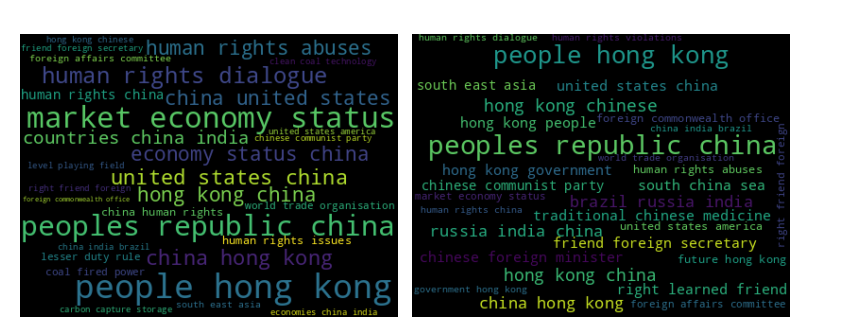

In [28]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#this code plots the word cloud. for labour and con common phrases.
# Function to plot a word cloud for the given phrases and counts
def plot_word_cloud(phrases_counts, title, position):
    wordcloud = WordCloud(background_color='black', colormap='viridis', width=400, height=300).generate_from_frequencies(dict(phrases_counts))
    plt.subplot(1, 2, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=15, color='white')

plt.figure(figsize=(8, 4))
plot_word_cloud(lab_top_phrases, "Top 20 3-word Phrases for Labour MPs", 1)
plot_word_cloud(con_top_phrases, "Top 20 3-word Phrases for Conservative MPs", 2)

plt.tight_layout()
plt.show()

In [29]:
from collections import Counter

lab_word_counts = Counter(" ".join(lab_references).split())
lab_top_words = lab_word_counts.most_common(20)

#print("Top 20 most common words for Labour MPs:")
#for word, count in lab_top_words:
 #   print(f"{word}: {count}")

con_word_counts = Counter(" ".join(con_references).split())
con_top_words = con_word_counts.most_common(20)

#print("Top 20 most common words for Conservative MPs:")
#for word, count in con_top_words:
 #   print(f"{word}: {count}")

#all_word_counts = Counter(" ".join(df_references['cleaned_ref2']).split())
#all_top_words = all_word_counts.most_common(100)

# Print the top 100 most common words across the whole dataset
#print("Top 100 most common words across the whole dataset:")
#for word, count in all_top_words:
 #   print(f"{word}: {count}") #uncomment this code to pring the top 100 words across the whole dataset.

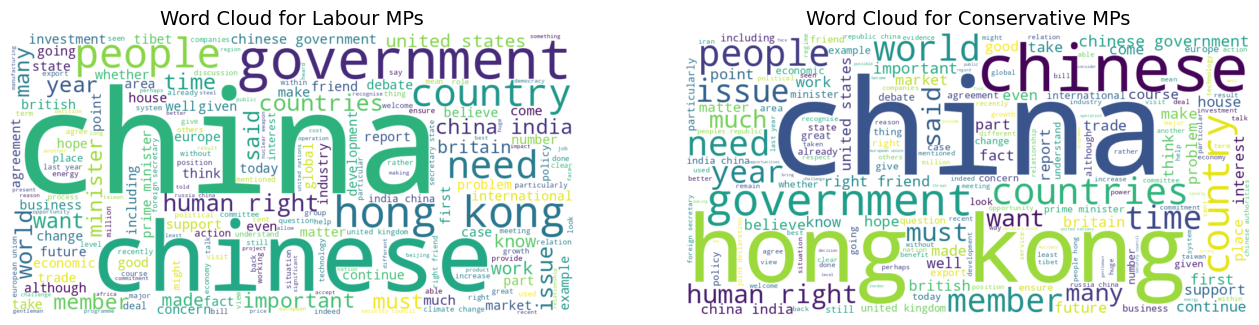

In [30]:
#this code does the same as the above execpt it does it for single words, not whole prhases.
lab_text = " ".join(lab_references)
con_text = " ".join(con_references)

lab_wordcloud = WordCloud(width=1000, height=500, background_color="white", contour_width=3, contour_color='steelblue')
con_wordcloud = WordCloud(width=1000, height=500, background_color="white", contour_width=3, contour_color='steelblue')
lab_wordcloud.generate(lab_text)
con_wordcloud.generate(con_text)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(lab_wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Word Cloud for Labour MPs", fontsize=14)

ax[1].imshow(con_wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Word Cloud for Conservative MPs", fontsize=14)
plt.show()

In [ ]:
#this code is assessing the class imbalances in the data showing that some categories have a very low number of observations across the whole dataset.
counts2 = df.groupby('moral_sentiment').size()
print(counts2) # for moral sentiment

category_counts = df['moral_mf_single'].value_counts()
total_rows = len(df)
proportions = category_counts / total_rows
print(proportions) # for each of the moral foundation categories.

In [31]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
import nltk
nltk.download('punkt')
nltk.download('stopwords')

df1 = pd.read_csv('ref_moral.csv')
df2 = df1.copy()

#checking that all short references have been removes and also getting some summary statistics on the references in the references to China data set.
def filter_short_references(text):
    words = text.split()
    if len(words) >= 30:
        return text
    else:
        return None

df2['Reference to China'] = df2['Reference to China'].apply(filter_short_references)
df2= df2.dropna(subset=['Reference to China'])
df = df2.copy()

# To calculate the average length of references in the data, the length of each reference is computed and the mean taken and printed.
df['Reference Length'] = df['text4'].apply(lambda x: len(word_tokenize(x)))
average_reference_length = df['Reference Length'].mean()
print(f"Average Length of References in Words: {average_reference_length:.2f}")

#df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average Length of References in Words: 84.63


In [32]:
# As I am using the full dataset again strange characters have to be removed
def remove_weird_characters(text):
    pattern = r"[^\w\s']"
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text
def preprocess_text(text):
    text = text.lower().replace('[^a-zA-Z0-9]', ' ')
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return words

df['Reference to China'] = df['Reference to China'].apply(remove_weird_characters)
preprocessed_texts = df['Reference to China'].apply(preprocess_text).tolist()

This next section of the code performs the 5 different sampling techniques to try and correct for the class imbalance shown in the previously calculated proportions. The sampling techniques are adapted from this paper: Kaufman, A. R. (2023). Selecting More Informative Training Sets with Fewer Observations. Political Analysis, 1-7.

In [33]:
#this section performs the sampling techniques which use the Word2Vec model for locally trained embeddings to achieve dimensionality reductions.
model = Word2Vec(sentences=preprocessed_texts, vector_size=100, window=5, min_count=5, workers=4)
model.save('word2vec_model.bin')

#a function which creates document embeddings from the word embeddings - the mean word embedding across each of the references in the dataset.
document_embeddings = []
for words in preprocessed_texts:
    word_embeddings = [model.wv[word] for word in words if word in model.wv]
    if word_embeddings:
        doc_embedding = np.mean(word_embeddings, axis=0)
    else:
        doc_embedding = np.zeros(model.vector_size)
    document_embeddings.append(doc_embedding)

document_embeddings = np.array(document_embeddings)
print(document_embeddings.shape)

(15200, 100)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPRegressor

#doucment embeddings need to be the suitable format of a numpy array.
document_embeddings = np.array(document_embeddings)

#this block of code sets up the calculation for reconstuction loss using the MLPRegressor, it then fits the model on the previously calculated document embeddings, calculates the reconstruction loss for each text.
model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam')
model.fit(document_embeddings, document_embeddings)
reconstructed_embeddings = model.predict(document_embeddings)
reconstruction_loss = np.mean((reconstructed_embeddings - document_embeddings) ** 2, axis=1)
df['Reconstruction Loss'] = reconstruction_loss

#to get the texts which have the highest reconstruction loss the dataframe is sorted and a subset is selected.
sorted_df = df.sort_values(by='Reconstruction Loss', ascending=False)
subset_df = sorted_df.head(1500)
subset_df.to_csv('sample1.csv', index=False)

In [35]:
#the next sampling techniques uses a different similarity metric - cosine distances rather than reconstruction loss, to max the within sample differences between texts a greedy algorthim is used.
from sklearn.metrics.pairwise import cosine_distances

# Here the pairwise cosine distances between document embeddings are computes
distance_matrix = cosine_distances(document_embeddings)

# I have simply chosen the first text as the starting text for creating the n=1500 subset
subset_indices = [0]

# Iterating over the cosine distances between pairs of documents taking the cosine distance which is most different from the text that is currently selected, this repeats until the desired subset size is reached
while len(subset_indices) < 1500:
    subset_distances = distance_matrix[subset_indices, :]
    mean_distances = np.mean(subset_distances, axis=0)
    max_distance_index = np.argmax(mean_distances)
    subset_indices.append(max_distance_index)

subset_df = df.iloc[subset_indices]
subset_df.to_csv('sample2.csv')

In [36]:
#the third sampling technique simply computes all the consine distances between all the documents and sample the 1500 documents which have have highest dissimilarity.
# First get the average cos. distance for each document
average_distances = np.mean(distance_matrix, axis=1)
#then sort so that the highest values are first and select the top 1500 rows.
sorted_indices = np.argsort(average_distances)[::-1]
subset_indices = sorted_indices[:1500]
subset_df = df.iloc[subset_indices]

subset_df.to_csv('sample3.csv')

In [37]:
#the second last sampling technqiue upon which the other techniques are trying to improve is the random sample of 1500 references to China.
subset_size = 1500
subset_df = df.sample(n=subset_size, random_state=42)
subset_df.to_csv('sample4.csv')

In [38]:
#now the proportions of each of the moral categories can be compared across all sampling techniques to see if they yield an improvement in class balance.
df_sample1 = pd.read_csv('sample1.csv')
df_sample2 = pd.read_csv('sample2.csv')
df_sample3 = pd.read_csv('sample3.csv')
df_sample4 = pd.read_csv('sample4.csv')

# Sample 1
sample1_counts = df_sample1['moral_mf_single'].value_counts()
sample1_proportions = df_sample1['moral_mf_single'].value_counts(normalize=True)
# Sample 2
sample2_counts = df_sample2['moral_mf_single'].value_counts()
sample2_proportions = df_sample2['moral_mf_single'].value_counts(normalize=True)
# Sample 3
sample3_counts = df_sample3['moral_mf_single'].value_counts()
sample3_proportions = df_sample3['moral_mf_single'].value_counts(normalize=True)
# Sample 4
sample4_counts = df_sample4['moral_mf_single'].value_counts()
sample4_proportions = df_sample4['moral_mf_single'].value_counts(normalize=True)

#comparing the counts and proportion by creating simple dataframes.
category_counts = pd.DataFrame({'Sample 1': sample1_counts, 'Sample 2': sample2_counts,
                           'Sample 3': sample3_counts, 'Sample 4': sample4_counts})

category_proportions = pd.DataFrame({'Sample 1': sample1_proportions, 'Sample 2': sample2_proportions,
                                'Sample 3': sample3_proportions, 'Sample 4': sample4_proportions})

print(category_counts)
print(category_proportions)

   Sample 1  Sample 2  Sample 3  Sample 4
0       921    1107.0       872       707
1       211      91.0       201       248
2        39     301.0        38        77
3        56       NaN        55       103
4       195       NaN       193       253
5        78       1.0       141       112
   Sample 1  Sample 2  Sample 3  Sample 4
0  0.614000  0.738000  0.581333  0.471333
1  0.140667  0.060667  0.134000  0.165333
2  0.026000  0.200667  0.025333  0.051333
3  0.037333       NaN  0.036667  0.068667
4  0.130000       NaN  0.128667  0.168667
5  0.052000  0.000667  0.094000  0.074667


In [39]:
#Now as the above did not improve upon the random sample an additional sampling technique is used which simple removes the catagories which are deemed as rare. leaving 3 moral foundation categories: 0,1 and 4.
df['Reference to China'] = df['Reference to China'].apply(lambda text: re.sub(r'\d+', '', text))
#print(df.head())
selected_rows = df[df['moral_mf_single'].isin([0, 1, 4])]

# Randomly sample 1500 references from the rows which now only have 3 possible categories.
sample_size = 1500
sample = selected_rows.sample(n=sample_size, random_state=42)

#Check that this techniques does improve the class imbalance for the moral foundations.
category_proportions = sample['moral_mf_single'].value_counts(normalize=True)
sentiment_proportions = sample['moral_sentiment'].value_counts(normalize=True)
print(category_proportions)
print(sentiment_proportions)

sample.to_csv('sample_done.csv', index=False)

#ensure that the rows which have not been sampled are made into a separate dataframe.
rows_not_in_sample = df[~df.index.isin(sample.index)]
rows_not_in_sample.to_csv('all_other_refs.csv', index=False)

0    0.576667
1    0.220000
4    0.203333
Name: moral_mf_single, dtype: float64
0    0.576667
1    0.293333
2    0.130000
Name: moral_sentiment, dtype: float64


In [40]:

import pandas as pd
from nltk.tokenize import word_tokenize
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from typing import List
import string
from typing import List
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv('references.csv')
#Refdf =pd.read_csv('ref_moral.csv')

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reference to China,speaker2,speech_id,speechnumber,party2,agenda,date2,Year
0,in almost 10 years the government have only tw...,Gerald Kaufman,644,33.0,Lab,Foreign Affairs And Defence [Orders Of The Day...,25/11/1988,1988
1,in britain we still have much work to do in th...,Emma Nicholson,1005,274.0,Con,Environment And Industry [Orders Of The Day],28/11/1988,1988
2,other countries to benefit from such visits ar...,Frank Dobson,1453,350.0,Lab,The Economy [Orders Of The Day],29/11/1988,1988
3,the one thing that we know about the governmen...,Jimmy Hood,2765,366.0,Lab,Electricity Bill [Orders Of The Day],03/12/1988,1988
4,the current agreement between the european com...,Alan Clark,4342,5.0,Con,Multi-Fibre Arrangement,09/12/1988,1988


This next section performs the exploratory topic modelling using the two techniques LDA and NMF.

In [41]:
#justifying why topic modelling is needed to understand what is being discussed beyond just what is contained in the agenda's for each reference.
china_percentage = df['agenda'].str.contains('China', case=False).mean() * 100
print(f"Percentage of rows containing the word 'China': {china_percentage:.2f}%")
hong_kong_percentage = df['agenda'].str.contains('Hong Kong', case=False).mean() * 100
print(f"Percentage of rows containing the word 'Hong Kong': {hong_kong_percentage:.2f}%")
taiwan_percentage = df['agenda'].str.contains('Taiwan', case=False).mean() * 100
print(f"Percentage of rows containing the word 'Taiwan': {taiwan_percentage:.2f}%")


Percentage of rows containing the word 'China': 12.06%
Percentage of rows containing the word 'Hong Kong': 11.73%
Percentage of rows containing the word 'Taiwan': 0.68%


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics.pairwise import pairwise_distances

#preparing the texts so that they are suitable for having the countVectorizer applied.
def preprocess_and_remove_stopwords(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in string.punctuation]
    return ' '.join(words)
df['Reference to China'] = df['Reference to China'].apply(preprocess_and_remove_stopwords)

preprocessed_text = df['Reference to China']
vectorizer = CountVectorizer(stop_words='english')
#Here I am creating the document term matrix for LDA using the preprocessed text.
doc_term_matrix = vectorizer.fit_transform(preprocessed_text)
#setting up the LDA model.
lda_model = LatentDirichletAllocation(random_state=42)

topic_sizes = [5, 10, 20] #the different topic sizes to be interated over are created here.

#this code creates a a nested for loop for performing k-fold cross-validation using 5 folds on the document term matrix - the cross- validation for hyperparamteter tuning approach is adapted from here: https://medium.com/@24littledino/k-fold-cv-hyper-parameter-tuning-in-python-4ad95880e477
#and here https://datascience.stackexchange.com/questions/104435/cross-validation-and-hyperparameter-tuning-workflow
for n_topics in topic_sizes:
    print(f"Number of topics: {n_topics}")
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    coherence_scores = []
    for train_index, test_index in cv.split(doc_term_matrix):
        X_train, X_test = doc_term_matrix[train_index], doc_term_matrix[test_index]
        lda_model.n_components = n_topics
        lda_model.fit(X_train)
        topic_matrix = lda_model.transform(X_test)
        #the cosine distance for the each fold for each topic size are computed and then averaged.
        distance_matrix = pairwise_distances(topic_matrix, metric='cosine')
        coherence = np.mean(1 - distance_matrix)
        coherence_scores.append(coherence)
    avg_coherence = np.mean(coherence_scores)
    print(f"Average Coherence Score for {n_topics} topics: {avg_coherence:.4f}")

Number of topics: 5
Average Coherence Score for 5 topics: 0.4747
Number of topics: 10
Average Coherence Score for 10 topics: 0.3849
Number of topics: 20
Average Coherence Score for 20 topics: 0.2303


In [43]:
#This code performs the same as the above but for NMF.
from sklearn.decomposition import NMF

#This creates the NMF model
nmf_model = NMF(random_state=42)

topic_sizes = [5, 10, 20] # the topic sizes to be interated over.

#the same function as above is use just replacing the LDA model with the NMF model. cosine distance is also used as the measure of coherence (averaged across all folds for that topic size).
for n_topics in topic_sizes:
    print(f"Number of topics: {n_topics}")
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    coherence_scores = []
    for train_index, test_index in cv.split(doc_term_matrix):
        X_train, X_test = doc_term_matrix[train_index], doc_term_matrix[test_index]
        nmf_model.n_components = n_topics
        nmf_model.fit(X_train)
        topic_matrix = nmf_model.transform(X_test)
        distance_matrix = pairwise_distances(topic_matrix, metric='cosine')
        coherence = np.mean(1 - distance_matrix)
        coherence_scores.append(coherence)
    avg_coherence = np.mean(coherence_scores)
    print(f"Average Coherence Score for {n_topics} topics: {avg_coherence:.4f}")

Number of topics: 5
Average Coherence Score for 5 topics: 0.5143
Number of topics: 10
Average Coherence Score for 10 topics: 0.3704
Number of topics: 20
Average Coherence Score for 20 topics: 0.2542


In [44]:
# the 5 topic across the NMF model performed the best therefore the model is fit using this hyperparamter.
best_n_topics = 5
nmf_model.n_components = best_n_topics
nmf_model.fit(doc_term_matrix)
topic_term_matrix = nmf_model.components_

#here I am extacting the top 20- words which are linked to each topic in the 5 topics of the NMF model.
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(topic_term_matrix):
    top_words_indices = topic.argsort()[:-21:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

Topic 1: china world countries india trade united uk people country states russia international years need economic new important year economy friend
Topic 2: hong kong people china 1997 right joint declaration law british democracy future republic basic confidence years britain friend foreign house
Topic 3: chinese people country minister right friend tibet authorities said british year foreign state years way say know world make new
Topic 4: rights human china tibet foreign dialogue international issues concerns minister abuses raised freedom including issue report record situation raise concern
Topic 5: government uk british minister steel industry support policy house secretary foreign right clear hope committee prime position time eu action


<Figure size 1000x600 with 0 Axes>

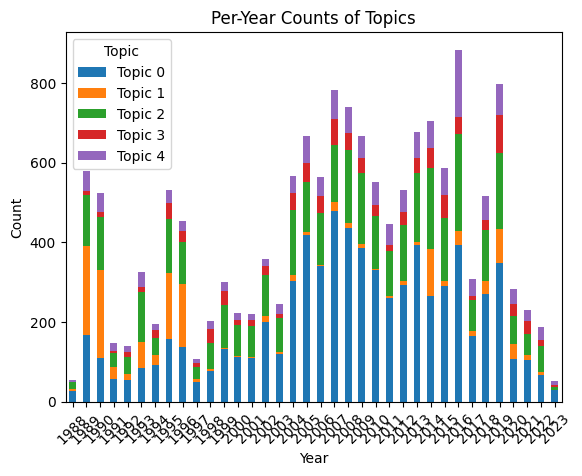

In [45]:
import matplotlib.pyplot as plt

best_n_topics = 5
nmf_model = NMF(n_components=best_n_topics, random_state=42)

# Fit the NMF model on the document-term matrix
nmf_model.fit(doc_term_matrix)

# Get the topic matrix (document-topic matrix) from NMF
topic_matrix = nmf_model.transform(doc_term_matrix)

# Get the dominant topic for each document
dominant_topic = topic_matrix.argmax(axis=1)

# Assign the dominant topics to the DataFrame
df['Topic'] = dominant_topic

grouped_df = df.groupby(['Year', 'Topic']).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='Year', columns='Topic', values='Count')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Per-Year Counts of Topics')
plt.legend(title='Topic', labels=[f'Topic {i}' for i in range(best_n_topics)])
plt.xticks(rotation=45)
plt.show()

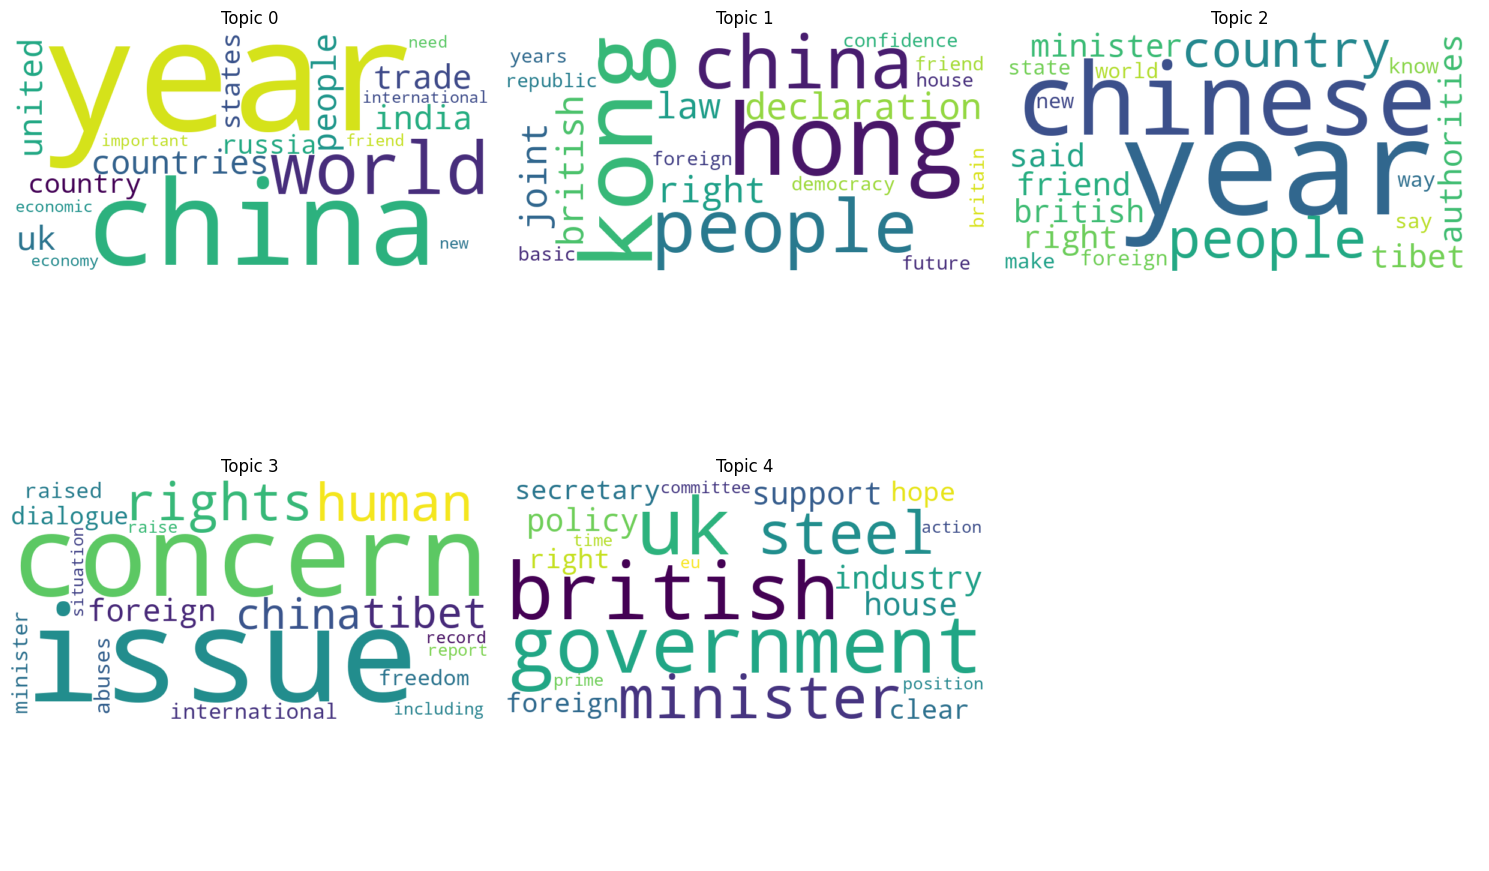

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to extract the top words from each topic
def get_top_words(model, feature_names, n_top_words):
    top_words_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_list.append(top_words)
    return top_words_list

# Get the top words for each topic from the NMF model
n_top_words = 20  # You can adjust the number of top words to display
feature_names = vectorizer.get_feature_names_out()
top_words_list = get_top_words(nmf_model, feature_names, n_top_words)

# Plot word clouds for each topic on a grid
n_cols = 3  # Number of columns in the grid
n_rows = (best_n_topics + n_cols - 1) // n_cols  # Number of rows in the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < best_n_topics:
        topic_words = ' '.join(top_words_list[i])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f"Topic {i}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

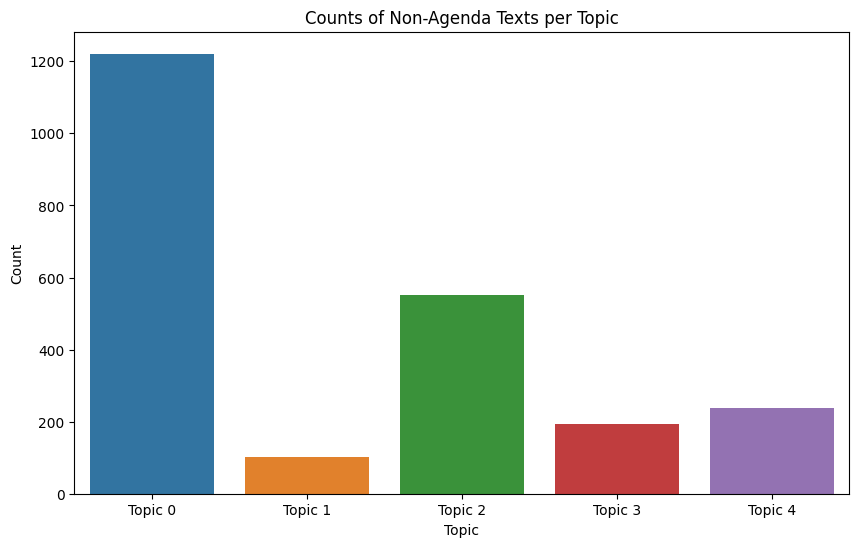

In [47]:
import seaborn as sns
# Create a mask to filter out rows with blank or NaN values in the 'agenda' column
mask_non_agenda = (df['agenda'].isnull()) | (df['agenda'] == '')

# Count the number of non-agenda texts per topic
non_agenda_counts = df[mask_non_agenda].groupby('Topic').size()
non_agenda_counts = non_agenda_counts.reindex(range(best_n_topics), fill_value=0)  # Fill missing topics with 0 count

# Get the topic labels (assuming 'Topic' column has integer values starting from 0)
topic_labels = [f'Topic {i}' for i in range(best_n_topics)]

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_labels, y=non_agenda_counts)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Counts of Non-Agenda Texts per Topic')
plt.show()

In [51]:
df1 = df.copy()
num_nan = df1['agenda'].isnull().sum()

# Calculate the total number of rows
total_rows = len(df1)

# Calculate the percentage of rows with blank 'agenda'
blank_agenda_percentage = ((num_nan) / total_rows) * 100
print(f"Percentage of rows with blank 'agenda': {blank_agenda_percentage:.2f}%")

Percentage of rows with blank 'agenda': 15.05%


In [53]:
df = pd.read_csv('sample_labelled1.csv')

# Replace 2, 3, and 5 with 6.
df['recoded'] = df['moral_mf_single'].apply(lambda x: 6 if x in [2, 3, 5] else x)
#df.head()

In [54]:
# Count the occurrences of each category in the "hand_codeds" column and calculate the proportions
hand_codeds_counts = df['hand_codeds'].value_counts(normalize=True)

# Count the occurrences of each category in the "hand_coded1" column and calculate the proportions
hand_coded1_counts = df['hand_coded1'].value_counts(normalize=True)

print(hand_codeds_counts)
print(hand_coded1_counts)

0    0.550
2    0.248
1    0.202
Name: hand_codeds, dtype: float64
0    0.550667
6    0.172667
1    0.154667
4    0.122000
Name: hand_coded1, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['hand_coded1'])  # Features (excluding the 'hand_codeds' column)
y_hand_codeds = df['hand_coded1']  # Target variable for 'hand_codeds' column
y_moral_sentiment = df['recoded']  # Target variable for 'moral_sentiment' column

# Step 2: Split the data into training and test sets for 'hand_codeds' and 'moral_sentiment'
X_train, X_test, y_train_hand_codeds, y_test_hand_codeds, y_train_moral_sentiment, y_test_moral_sentiment = train_test_split(X, y_hand_codeds, y_moral_sentiment, test_size=0.2, random_state=42)

# Step 5: Calculate the confusion matrix for 'hand_codeds' vs. 'moral_sentiment'
conf_matrix_moral_sentiment = confusion_matrix(y_test_hand_codeds, y_test_moral_sentiment)

# Step 6: Create a DataFrame for the confusion matrix with appropriate labels
class_labels = sorted(y_hand_codeds.unique())
confusion_df_moral_sentiment = pd.DataFrame(conf_matrix_moral_sentiment,
                                             index=[f"True {label}" for label in class_labels],
                                             columns=[f"Predicted {label}" for label in class_labels])

# Step 9: Plot the confusion matrix heatmap with per-class specificity annotations
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df_moral_sentiment, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for hand_coded1 vs. recoded (moral_sentiment)")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Step 4: Generate classification report for 'hand_codeds' vs. 'moral_sentiment'
print("Classification Report for hand_coded1 vs. recoded (Test Set):")
print("Hand_codeds:")
print(classification_report(y_test_hand_codeds, y_test_moral_sentiment, digits=4))

In [ ]:
df = pd.read_csv('sample_labelled1.csv')

# Step 1: Split into features (X) and target variable (y)
X = df.drop(columns=['hand_codeds'])  # Features (excluding the 'hand_codeds' column)
y_hand_codeds = df['hand_codeds']  # Target variable for 'hand_codeds' column
y_moral_sentiment = df['moral_sentiment']  # Target variable for 'moral_sentiment' column

# Step 2: Split the data into training and test sets for 'hand_codeds' and 'moral_sentiment'
X_train, X_test, y_train_hand_codeds, y_test_hand_codeds, y_train_moral_sentiment, y_test_moral_sentiment = train_test_split(X, y_hand_codeds, y_moral_sentiment, test_size=0.2, random_state=42)

# Step 4: Generate classification report for 'hand_codeds' vs. 'moral_sentiment'
print("Classification Report for hand_codeds vs. moral_sentiment (Test Set):")
print("Hand_codeds:")
print(classification_report(y_test_hand_codeds, y_test_moral_sentiment, digits=4))


 #Step 5: Calculate the confusion matrix for 'hand_codeds' vs. 'moral_sentiment'
conf_matrix_moral_sentiment = confusion_matrix(y_test_hand_codeds, y_test_moral_sentiment)

# Step 6: Create a DataFrame for the confusion matrix with appropriate labels
class_labels = sorted(y_hand_codeds.unique())
confusion_df_moral_sentiment = pd.DataFrame(conf_matrix_moral_sentiment,
                                             index=[f"True {label}" for label in class_labels],
                                             columns=[f"Predicted {label}" for label in class_labels])

# Step 7: Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_moral_sentiment, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for hand_codeds vs. moral_sentiment")
plt.show()